Image saved as elapsed_time.png


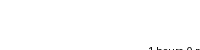

In [11]:
from PIL import Image, ImageDraw, ImageFont
from datetime import datetime

def create_time_image(start_timestamp, save_path="timestamp.png"):
    # Create a new image with a white background
    img = Image.new('RGB', (400, 100), color='white')
    draw = ImageDraw.Draw(img)
    
    # Calculate time difference
    start_time = datetime.fromisoformat(start_timestamp)
    current_time = datetime.now()
    diff = current_time - start_time
    
    # Calculate different units
    days = diff.days
    hours = diff.seconds // 3600
    minutes = (diff.seconds % 3600) // 60
    
    # Create the time string
    if days > 0:
        time_text = f"{days} days, {hours} hours ago"
    elif hours > 0:
        time_text = f"{hours} hours, {minutes} minutes ago"
    else:
        time_text = f"{minutes} minutes ago"
    
    # Use default font
    font = ImageFont.load_default()
    
    # Center the text
    text_bbox = draw.textbbox((0, 0), time_text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    
    x = (400 - text_width) / 2
    y = (100 - text_height) / 2
    
    # Add text to image
    draw.text((x, y), time_text, font=font, fill='black')
    
    # Save the image
    img.save(save_path)
    print(f"Image saved as {save_path}")
    return img

# Test the function
if __name__ == "__main__":
    # Use a timestamp from a few hours ago
    timestamp = "2024-10-30T09:00:00"
    image = create_time_image(timestamp, "elapsed_time.png")
    
    # If you're in Colab, you can also display the image
    try:
        from IPython.display import display
        display(image)
    except ImportError:
        print("Image created successfully! Check elapsed_time.png")

In [13]:
from PIL import Image, ImageDraw, ImageFont
from datetime import datetime

def create_time_image(start_timestamp, save_path="timestamp.png", padding=5):
    # Use default font
    font = ImageFont.load_default()
    
    # Calculate time difference
    start_time = datetime.fromisoformat(start_timestamp)
    current_time = datetime.now()
    diff = current_time - start_time
    
    # Calculate different units
    days = diff.days
    hours = diff.seconds // 3600
    minutes = (diff.seconds % 3600) // 60
    
    # Create the time string
    if days > 0:
        time_text = f"{days} days, {hours} hours ago"
    elif hours > 0:
        time_text = f"{hours} hours, {minutes} minutes ago"
    else:
        time_text = f"{minutes} minutes ago"
    
    # Get text size
    dummy_draw = ImageDraw.Draw(Image.new('RGB', (1, 1)))
    text_bbox = dummy_draw.textbbox((0, 0), time_text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    
    # Create image with exact size plus minimal padding
    img_width = text_width + (padding * 2)
    img_height = text_height + (padding * 2)
    img = Image.new('RGB', (img_width, img_height), color='white')
    draw = ImageDraw.Draw(img)
    
    # Draw text with minimal padding
    draw.text((padding, padding), time_text, font=font, fill='black')
    
    # Save the image
    img.save(save_path)
    print(f"Image saved as {save_path}")
    return img

# Test the function
if __name__ == "__main__":
    # Use a timestamp from a few hours ago
    timestamp = "2024-10-30T10:00:00"
    image = create_time_image(timestamp, "elapsed_time.png")
    
    # If you're in Colab, you can also display the image
    try:
        from IPython.display import display
        display(image)
    except ImportError:
        print("Image created successfully! Check elapsed_time.png")

Image saved as elapsed_time.png


In [2]:
from urllib.parse import quote

timestamp = quote("2024-11-06+18:29:05.662697+00:00")
print(timestamp)


2024-11-06%2B18%3A29%3A05.662697%2B00%3A00


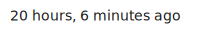

<?xml version="1.0" encoding="UTF-8"?>
<svg xmlns="http://www.w3.org/2000/svg" width="204" height="32">
    <style>
        .container {
            display: inline-block;
            padding: 6px 10px;
            background-color: white;
            filter: drop-shadow(0 1px 2px rgb(0 0 0 / 0.1));
        }
        .timeText {
            font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Oxygen,
                        Ubuntu, Cantarell, 'Open Sans', 'Helvetica Neue', sans-serif;
            font-size: 14px;
            fill: #1a1a1a;
            dominant-baseline: central;
        }
    </style>
    <rect width="100%" height="100%" rx="4" fill="white"/>
    <text x="10" y="16" class="timeText">20 hours, 6 minutes ago</text>
</svg>


In [16]:
from datetime import datetime
import pytz
from IPython.display import SVG, display
import re

class TimeElapsedSVG:
    def __init__(self, start_timestamp):
        self.start_timestamp = start_timestamp

    def _get_time_units(self):
        """Calculate time units and return display text"""
        start_time = datetime.fromisoformat(self.start_timestamp)
        current_time = datetime.now(pytz.UTC)
        diff = current_time - start_time

        days = diff.days
        hours = diff.seconds // 3600
        minutes = (diff.seconds % 3600) // 60

        if days > 0:
            return f"{days} days, {hours} hours ago"
        elif hours > 0:
            return f"{hours} hours, {minutes} minutes ago"
        else:
            return f"{minutes} minutes ago"

    def create_svg(self):
        """Create an SVG with the time elapsed text"""
        time_text = self._get_time_units()
        
        # Calculate approximate width based on text length
        # Rough estimate: each character is about 8px wide
        text_width = len(time_text) * 8
        total_width = text_width + 20  # Add padding
        
        svg_content = f'''<?xml version="1.0" encoding="UTF-8"?>
<svg xmlns="http://www.w3.org/2000/svg" width="{total_width}" height="32">
    <style>
        .container {{
            display: inline-block;
            padding: 6px 10px;
            background-color: white;
            filter: drop-shadow(0 1px 2px rgb(0 0 0 / 0.1));
        }}
        .timeText {{
            font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Oxygen,
                        Ubuntu, Cantarell, 'Open Sans', 'Helvetica Neue', sans-serif;
            font-size: 14px;
            fill: #1a1a1a;
            dominant-baseline: central;
        }}
    </style>
    <rect width="100%" height="100%" rx="4" fill="white"/>
    <text x="10" y="16" class="timeText">{time_text}</text>
</svg>'''
        
        return svg_content

    def display(self):
        """Display the SVG in Jupyter notebook"""
        svg_content = self.create_svg()
        display(SVG(svg_content))

# Example usage (copy this to a new cell to test):
timestamp = "2024-10-30T15:00:00+00:00"
svg_creator = TimeElapsedSVG(timestamp)
svg_creator.display()

# If you want to see the raw SVG code:
print(svg_creator.create_svg())